In [1]:
import pandas as pd
import numpy as np
import sklearn
from numpy.linalg import eig
from sklearn.model_selection import train_test_split

In [2]:
import import_ipynb
from mda_pca_function import pca, mda

importing Jupyter notebook from mda_pca_function.ipynb


In [3]:
df = pd.read_csv('train_set.csv')
df

,Unnamed: 0,REG3A,COL1A1,OLFM4,HAMP,COL1A2,TIMP3,H19,FN1,IGFBP5,...,GABRA1,GPR65,ITGAM,MSR1,NLRP3,CNTD2,ADGRG1,ATP1B2,LMO7,AJAP1
0,8171,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.00000,0.000000
1,7315,0.0,0.000000,0.558280,0.0,0.0,0.0,0.0,0.0,0.558280,...,0.0,0.0,0.0,0.0,0.0,0.0,0.558280,0.000000,0.00000,0.000000
2,6592,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,2.069595,0.000000,1.49533,0.000000
3,7535,0.0,1.158851,1.158851,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.00000,0.738663
4,4201,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.00000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6850,2953,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.00000,0.000000
6851,7489,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,1.218661,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.00000,0.000000
6852,8064,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.701552,...,0.0,0.0,0.0,0.0,0.0,0.0,0.701552,0.701552,0.00000,0.000000
6853,1772,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.00000,0.000000


In [4]:
df = df.drop('Unnamed: 0', axis=1)
df

,REG3A,COL1A1,OLFM4,HAMP,COL1A2,TIMP3,H19,FN1,IGFBP5,COL3A1,...,GABRA1,GPR65,ITGAM,MSR1,NLRP3,CNTD2,ADGRG1,ATP1B2,LMO7,AJAP1
0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.00000,0.000000
1,0.0,0.000000,0.558280,0.0,0.0,0.0,0.0,0.0,0.558280,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.558280,0.000000,0.00000,0.000000
2,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2.069595,0.000000,1.49533,0.000000
3,0.0,1.158851,1.158851,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.00000,0.738663
4,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.00000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6850,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.00000,0.000000
6851,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,1.218661,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.00000,0.000000
6852,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.701552,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.701552,0.701552,0.00000,0.000000
6853,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.00000,0.000000


In [5]:
df.shape

(6855, 2000)

In [6]:
ref_labels = pd.read_csv("train_label.csv")
ref_labels

,Unnamed: 0,x
0,8171,alpha
1,7315,alpha
2,6592,beta
3,7535,ductal
4,4201,alpha
...,...,...
6850,2953,beta
6851,7489,beta
6852,8064,beta
6853,1772,alpha


In [7]:
df['labels'] = ref_labels.x

In [8]:
df

,REG3A,COL1A1,OLFM4,HAMP,COL1A2,TIMP3,H19,FN1,IGFBP5,COL3A1,...,GPR65,ITGAM,MSR1,NLRP3,CNTD2,ADGRG1,ATP1B2,LMO7,AJAP1,labels
0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.00000,0.000000,alpha
1,0.0,0.000000,0.558280,0.0,0.0,0.0,0.0,0.0,0.558280,0.0,...,0.0,0.0,0.0,0.0,0.0,0.558280,0.000000,0.00000,0.000000,alpha
2,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,2.069595,0.000000,1.49533,0.000000,beta
3,0.0,1.158851,1.158851,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.00000,0.738663,ductal
4,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.00000,0.000000,alpha
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6850,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.00000,0.000000,beta
6851,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,1.218661,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.00000,0.000000,beta
6852,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.701552,0.0,...,0.0,0.0,0.0,0.0,0.0,0.701552,0.701552,0.00000,0.000000,beta
6853,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.00000,0.000000,alpha


In [9]:
from sklearn.preprocessing import OrdinalEncoder

ord_enc = OrdinalEncoder()
df["labels"] = ord_enc.fit_transform(df[["labels"]])
df

,REG3A,COL1A1,OLFM4,HAMP,COL1A2,TIMP3,H19,FN1,IGFBP5,COL3A1,...,GPR65,ITGAM,MSR1,NLRP3,CNTD2,ADGRG1,ATP1B2,LMO7,AJAP1,labels
0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.00000,0.000000,2.0
1,0.0,0.000000,0.558280,0.0,0.0,0.0,0.0,0.0,0.558280,0.0,...,0.0,0.0,0.0,0.0,0.0,0.558280,0.000000,0.00000,0.000000,2.0
2,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,2.069595,0.000000,1.49533,0.000000,3.0
3,0.0,1.158851,1.158851,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.00000,0.738663,5.0
4,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.00000,0.000000,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6850,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.00000,0.000000,3.0
6851,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,1.218661,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.00000,0.000000,3.0
6852,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.701552,0.0,...,0.0,0.0,0.0,0.0,0.0,0.701552,0.701552,0.00000,0.000000,3.0
6853,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.00000,0.000000,2.0


In [10]:
df.labels.nunique()

14

In [336]:
mda_components = mda(df,14)
mda_components.shape

(2000, 14)

In [11]:
sorted_eigen_vec, varience = pca(df.iloc[:,0:2000])
pca_components = sorted_eigen_vec[:,0:100]
pca_components.shape

(2000, 2000)


(2000, 100)

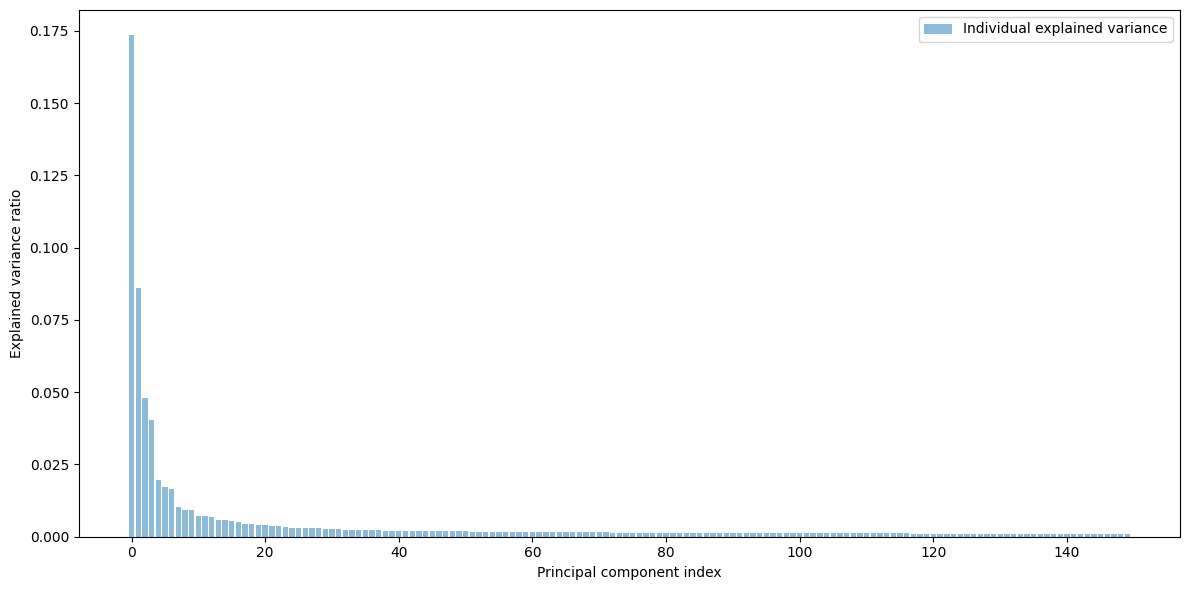

In [338]:
import matplotlib.pyplot as plt
#plt.plot(varience[:35])
plt.figure(figsize=(12, 6))  # Increase the figure size

bar_width = 0.4  

cum_sum_exp = np.cumsum(varience[:150])
plt.bar(range(0,len(varience[:150])), varience[:150], alpha=0.5, align='center', label='Individual explained variance')
#plt.step(range(0,len(cum_sum_exp)), cum_sum_exp, where='mid',label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.tight_layout()
# for i, value in enumerate(cum_sum_exp):
#     plt.text(i, 0.0, str(round(value, 2)), ha='center', va='bottom')
#     plt.ylim(0, max(cum_sum_exp) + 0.1)  # Set the y-axis limits to accommodate the annotations
plt.show()

In [339]:
components = np.concatenate((mda_components, pca_components), axis=1)
components.shape

(2000, 114)

In [340]:
#transforming the data
data = df.drop('labels', axis=1)
data

,REG3A,COL1A1,OLFM4,HAMP,COL1A2,TIMP3,H19,FN1,IGFBP5,COL3A1,...,GABRA1,GPR65,ITGAM,MSR1,NLRP3,CNTD2,ADGRG1,ATP1B2,LMO7,AJAP1
0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.00000,0.000000
1,0.0,0.000000,0.558280,0.0,0.0,0.0,0.0,0.0,0.558280,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.558280,0.000000,0.00000,0.000000
2,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2.069595,0.000000,1.49533,0.000000
3,0.0,1.158851,1.158851,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.00000,0.738663
4,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.00000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6850,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.00000,0.000000
6851,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,1.218661,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.00000,0.000000
6852,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.701552,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.701552,0.701552,0.00000,0.000000
6853,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.00000,0.000000


In [341]:
transformed_data = np.dot(data, components)
transformed_data.shape

(6855, 114)

In [342]:
transformed_data

array([[-1.92340165e-03+0.j, -2.50040791e-02+0.j, -1.56904927e-02+0.j,
        ...,  5.66675752e-01+0.j,  1.96944137e-01+0.j,
         1.61031089e-01+0.j],
       [ 3.66827218e-03+0.j, -1.91799860e-02+0.j, -3.46865903e-02+0.j,
        ...,  9.23055483e-01+0.j,  1.04826894e-02+0.j,
         1.05885168e-01+0.j],
       [ 2.31984152e-03+0.j, -9.66717501e-03+0.j,  5.32190928e-03+0.j,
        ...,  4.63809136e-01+0.j,  1.31565855e+00+0.j,
        -6.04021003e-01+0.j],
       ...,
       [-1.82397175e-03+0.j, -1.20756743e-02+0.j, -2.37280044e-03+0.j,
        ...,  5.03940530e-01+0.j, -4.19049784e-01+0.j,
        -1.02954485e+00+0.j],
       [-4.47429742e-03+0.j, -1.04381655e-02+0.j, -2.58272024e-02+0.j,
        ...,  6.74822638e-02+0.j, -5.79927308e-01+0.j,
        -1.00825893e+00+0.j],
       [ 1.95662436e-03+0.j, -5.77947267e-03+0.j,  7.96671116e-03+0.j,
        ...,  7.27695198e-01+0.j, -1.85978337e+00+0.j,
         5.26946438e-01+0.j]])

In [343]:
#saving the pca file to give to harmony as reference
transformed_data = pd.DataFrame(transformed_data.real)
transformed_data.head()

,0,1,2,3,4,5,6,7,8,9,...,104,105,106,107,108,109,110,111,112,113
0,-0.001923,-0.025004,-0.015690,0.094227,0.002820,-0.004624,0.010842,-0.394335,0.005285,-0.004266,...,0.188434,-0.586506,1.923552,0.690731,0.340410,0.513810,0.097069,0.566676,0.196944,0.161031
1,0.003668,-0.019180,-0.034687,0.083144,-0.005256,0.007582,0.011511,-0.417018,0.019941,-0.027600,...,0.255154,-0.142429,-0.572005,0.484052,-0.681921,-0.015947,-1.513590,0.923055,0.010483,0.105885
2,0.002320,-0.009667,0.005322,0.077815,-0.000432,-0.014143,0.004369,0.257455,-0.008803,-0.039687,...,-0.035525,-0.498188,-0.479553,1.225021,-0.373592,-0.371457,-1.027109,0.463809,1.315659,-0.604021
3,0.000119,-0.025087,-0.001967,-0.528368,-0.012153,0.053937,-0.030431,-0.128392,-0.374418,-0.040054,...,-0.880226,0.032300,0.034797,1.335745,-1.190682,0.564554,-0.313001,1.106930,-0.780474,1.593696
4,-0.009881,-0.020543,-0.010572,0.082419,0.000470,-0.004358,0.001871,-0.273569,0.015811,-0.050608,...,0.076012,-0.813198,0.115601,0.091502,-0.113200,-0.017049,0.707253,-1.700033,0.353025,0.868951


In [344]:
transformed_data['labels'] = df.labels
transformed_data

,0,1,2,3,4,5,6,7,8,9,...,105,106,107,108,109,110,111,112,113,labels
0,-0.001923,-0.025004,-0.015690,0.094227,0.002820,-0.004624,0.010842,-0.394335,0.005285,-0.004266,...,-0.586506,1.923552,0.690731,0.340410,0.513810,0.097069,0.566676,0.196944,0.161031,2.0
1,0.003668,-0.019180,-0.034687,0.083144,-0.005256,0.007582,0.011511,-0.417018,0.019941,-0.027600,...,-0.142429,-0.572005,0.484052,-0.681921,-0.015947,-1.513590,0.923055,0.010483,0.105885,2.0
2,0.002320,-0.009667,0.005322,0.077815,-0.000432,-0.014143,0.004369,0.257455,-0.008803,-0.039687,...,-0.498188,-0.479553,1.225021,-0.373592,-0.371457,-1.027109,0.463809,1.315659,-0.604021,3.0
3,0.000119,-0.025087,-0.001967,-0.528368,-0.012153,0.053937,-0.030431,-0.128392,-0.374418,-0.040054,...,0.032300,0.034797,1.335745,-1.190682,0.564554,-0.313001,1.106930,-0.780474,1.593696,5.0
4,-0.009881,-0.020543,-0.010572,0.082419,0.000470,-0.004358,0.001871,-0.273569,0.015811,-0.050608,...,-0.813198,0.115601,0.091502,-0.113200,-0.017049,0.707253,-1.700033,0.353025,0.868951,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6850,0.001376,0.001507,0.002547,0.029158,-0.008738,-0.019816,0.003964,0.204509,0.007115,0.002282,...,-1.392545,-0.225388,0.790638,0.435018,0.980117,0.226116,0.466261,0.696264,-0.261353,3.0
6851,-0.001893,-0.006201,0.009586,0.032324,0.007978,0.036584,0.013876,0.246597,-0.032781,0.003337,...,-0.259079,0.409743,0.909419,-0.844115,-0.372323,-0.107490,0.106997,0.155416,0.911641,3.0
6852,-0.001824,-0.012076,-0.002373,0.082165,0.009380,-0.020962,0.006382,0.196894,-0.026452,-0.061936,...,0.067376,-0.006047,-0.637844,0.543877,-0.998291,0.166412,0.503941,-0.419050,-1.029545,3.0
6853,-0.004474,-0.010438,-0.025827,0.135893,0.005073,-0.004421,0.004752,-0.293780,0.032417,-0.024768,...,1.437508,0.324040,-0.631292,-0.625357,0.517872,0.363291,0.067482,-0.579927,-1.008259,2.0


In [345]:
transformed_data.to_csv("projected_data_files/pca_plus_mda_projected_ref.csv")

In [346]:
components.shape

(2000, 114)

In [347]:
df2 = pd.read_csv("test_set.csv")
print(df2.head())
print(df2.shape)

   Unnamed: 0  REG3A  COL1A1  OLFM4  HAMP  COL1A2  TIMP3  H19  FN1    IGFBP5  \
0        1449    0.0     0.0    0.0   0.0     0.0    0.0  0.0  0.0  0.000000   
1        3838    0.0     0.0    0.0   0.0     0.0    0.0  0.0  0.0  0.000000   
2        3587    0.0     0.0    0.0   0.0     0.0    0.0  0.0  0.0  1.518432   
3         810    0.0     0.0    0.0   0.0     0.0    0.0  0.0  0.0  0.000000   
4        4875    0.0     0.0    0.0   0.0     0.0    0.0  0.0  0.0  0.000000   

   ...  GABRA1  GPR65  ITGAM  MSR1  NLRP3  CNTD2    ADGRG1  ATP1B2  LMO7  \
0  ...     0.0    0.0    0.0   0.0    0.0    0.0  0.955610     0.0   0.0   
1  ...     0.0    0.0    0.0   0.0    0.0    0.0  0.879231     0.0   0.0   
2  ...     0.0    0.0    0.0   0.0    0.0    0.0  0.000000     0.0   0.0   
3  ...     0.0    0.0    0.0   0.0    0.0    0.0  0.000000     0.0   0.0   
4  ...     0.0    0.0    0.0   0.0    0.0    0.0  1.201076     0.0   0.0   

   AJAP1  
0    0.0  
1    0.0  
2    0.0  
3    0.0  
4    0.

In [348]:
df2 = df2.drop('Unnamed: 0', axis=1)
df2

,REG3A,COL1A1,OLFM4,HAMP,COL1A2,TIMP3,H19,FN1,IGFBP5,COL3A1,...,GABRA1,GPR65,ITGAM,MSR1,NLRP3,CNTD2,ADGRG1,ATP1B2,LMO7,AJAP1
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.955610,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.879231,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.518432,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.201076,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1709,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
1710,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
1711,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
1712,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.879842,0.0,0.0,0.0


In [349]:
pbmc2_com = np.dot(df2.values, components.real)
pbmc2_com

array([[-0.00227854, -0.0075465 ,  0.00712609, ..., -0.13263615,
        -0.79867939, -0.61189573],
       [-0.00226198, -0.01260899, -0.00458726, ..., -1.11037425,
         0.0166299 ,  0.23690097],
       [-0.01183114,  0.00527021, -0.00391571, ..., -0.79526702,
        -0.95174962, -0.14266161],
       ...,
       [-0.01507422, -0.05391395, -0.03374923, ...,  0.45619663,
        -0.24899777,  0.63122051],
       [-0.00427752, -0.03151619, -0.02238719, ..., -1.71771624,
        -0.30718809,  0.94693197],
       [-0.00310329, -0.01339459, -0.01433466, ..., -0.66328063,
         0.24174643, -0.20143629]])

In [350]:
pbmc2_com.shape

(1714, 114)

In [351]:
#saving the components of pbmc2 with the barcodes
pbmc2_com = pd.DataFrame(pbmc2_com.real)
pbmc2_com


,0,1,2,3,4,5,6,7,8,9,...,104,105,106,107,108,109,110,111,112,113
0,-0.002279,-0.007546,0.007126,0.048498,-0.003704,0.028121,0.002361,-0.008235,0.048270,0.024728,...,-0.041245,-0.305463,0.084655,-0.672622,0.002808,0.352500,-0.149267,-0.132636,-0.798679,-0.611896
1,-0.002262,-0.012609,-0.004587,0.096040,0.000824,-0.006874,0.007518,0.180413,-0.010146,-0.013277,...,-0.137426,-0.560176,-2.045656,0.097687,-1.354713,-0.932198,0.420677,-1.110374,0.016630,0.236901
2,-0.011831,0.005270,-0.003916,0.068531,0.001023,-0.023515,0.014321,-0.365488,0.005484,0.002357,...,1.208649,0.097035,-0.400733,0.455560,-0.445604,0.979508,0.855847,-0.795267,-0.951750,-0.142662
3,-0.004480,0.003783,0.000651,0.054710,0.012231,0.019709,0.010214,0.046974,0.043062,-0.006082,...,0.292724,-0.857128,-0.308863,-0.010716,0.981239,0.252043,1.312803,1.201444,-0.312462,-0.085886
4,0.012988,-0.028110,-0.013707,0.139082,0.022805,-0.002346,0.022711,-0.418287,0.038830,-0.027737,...,0.167385,-0.778295,-1.578430,0.645318,-1.348323,0.650166,0.108814,0.117843,0.257207,0.393765
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1709,-0.009320,0.001413,-0.021748,0.004968,0.002166,0.030701,-0.023896,0.111370,0.036080,0.083887,...,-0.589352,0.375027,0.050833,0.942633,-0.271620,-0.139077,-0.914368,-1.082027,-0.105521,0.381511
1710,-0.010129,-0.016456,0.031422,-0.513993,-0.017866,0.084860,-0.021472,-0.071512,0.527784,0.039649,...,0.247321,1.235068,-0.533738,0.460930,-0.437697,-1.263391,-0.816985,-1.062030,-0.247723,-0.692043
1711,-0.015074,-0.053914,-0.033749,-0.582308,0.012372,0.105530,-0.032795,-0.193629,-0.595482,0.005176,...,0.231945,-0.280489,-2.240521,-0.214311,-0.513649,-0.812507,0.239637,0.456197,-0.248998,0.631221
1712,-0.004278,-0.031516,-0.022387,0.140345,0.010036,0.018000,0.022048,-0.439609,0.019480,-0.016848,...,-0.434630,0.281102,-1.006152,0.387937,1.320954,-1.076283,-0.252233,-1.717716,-0.307188,0.946932


In [352]:
pbmc2_com.to_csv("projected_data_files/pca_plus_mda_projected_query.csv")